# MOTIVE
1. To classify the the test data into 'Positive', 'Negative' and 'Neutral' trade-points for the next 100 ticks.
2. To return the corresponding top bid and top ask prices of positive trade points.

It helps us figure out those points of time in future where the market will tend to rise above or below certain threshold prices. If the model predicts the market to go above the high threshold price after certain number of ticks, we can take a chance to sell the shares on that tick. Contrary to that, if the model predicts the market to go below the low threshold price, we can take a chance to buy the shares.

# TASK INPUTS
The raw data had the following 57 features:
BINANCE_BTC-USDT_ask_1,BINANCE_BTC-USDT_askq_1,BINANCE_BTC-USDT_bid_1,BINANCE_BTC-USDT_bidq_1,BINANCE_BTC-USDT_ask_2,BINANCE_BTC-USDT_askq_2,BINANCE_BTC-USDT_bid_2,BINANCE_BTC-USDT_bidq_2,BINANCE_BTC-USDT_ask_3,BINANCE_BTC-USDT_askq_3,BINANCE_BTC-USDT_bid_3,BINANCE_BTC-USDT_bidq_3,BINANCE_BTC-USDT_ask_4,BINANCE_BTC-USDT_askq_4,BINANCE_BTC-USDT_bid_4,BINANCE_BTC-USDT_bidq_4,BINANCE_BTC-USDT_ask_5,BINANCE_BTC-USDT_askq_5,BINANCE_BTC-USDT_bid_5,BINANCE_BTC-USDT_bidq_5,BINANCE_BTC-USDT_ask_6,BINANCE_BTC-USDT_askq_6,BINANCE_BTC-USDT_bid_6,BINANCE_BTC-USDT_bidq_6,BINANCE_BTC-USDT_ask_7,BINANCE_BTC-USDT_askq_7,BINANCE_BTC-USDT_bid_7,BINANCE_BTC-USDT_bidq_7,BINANCE_BTC-USDT_ask_8,BINANCE_BTC-USDT_askq_8,BINANCE_BTC-USDT_bid_8,BINANCE_BTC-USDT_bidq_8,BINANCE_BTC-USDT_ask_9,BINANCE_BTC-USDT_askq_9,BINANCE_BTC-USDT_bid_9,BINANCE_BTC-USDT_bidq_9,BINANCE_BTC-USDT_ask_10,BINANCE_BTC-USDT_askq_10,BINANCE_BTC-USDT_bid_10,BINANCE_BTC-USDT_bidq_10,timestamp,New_Sell_Orders_No,Sum_Sell_Order_Prices,Total_Qty_Sell_Orders,New_Buy_Orders_No,Sum_Buy_Order_Prices,Total_Qty_Buy_Orders,Sell_Orders_No_Cancelled,Sum_Sell_Order_Prices_Cancelled,Total_Qty_Sell_Orders_Cancelled,Buy_Orders_No_Cancelled,Sum_Buy_Order_Prices_Cancelled,Total_Qty_Buy_Orders_Cancelled,No_of_Trades,Trade_Price_Sum,Trade_Qty_Sum,LTP

# TASK OUTPUTS
1. To classify the the test data into 'Positive', 'Negative' and 'Neutral' trade-points for the next 100 ticks.
2. To return the corresponding top bid and top ask prices of positive trade points.

# KEY PERFORMANCE INDICATOR (KPI)
The solution can be measured in terms of the number of samples successfully classified as Positive and Negative against all the samples in the next 100 ticks. The result is depicted in the form of a confusion matrix for a total of **2500 test samples**:

                                                            
                                                            
                                                                
|   |   | **0**  |  **1** | **2**  |
|---|---|---|---|---|
|   | **0**  | 18423  | 2  | 78  |
|   | **1**  | 3451  | 9  | 1  |
|   | **2**  | 2985  | 0  | 51  |
                
- Class 2: Positive    (**return >= 2.1779**)
- Class 1: Negative    (**return <= -2.1779**)
- Class 0: Neutral     (**-2.1779 < return < 2.1779**)

In [3]:
from PIL import Image

# METHODOLOGY

## Feature Selection
After plotting the correlation heatmap of the return against all the above features, I rejected all the features that had no correlation with the return at all.


The **11** selected features had either positive or neGative correlation with the return.
Selected features:
1. b12
2. b13
3. b14
4. aten1
5. aten2
6. aten3
7. New_Buy_Orders_No
8. Sum_Buy_Order_Prices
9. Total_Qty_Buy_Orders
10. Buy_Orders_No_Cancelled
11. acc_diff_v

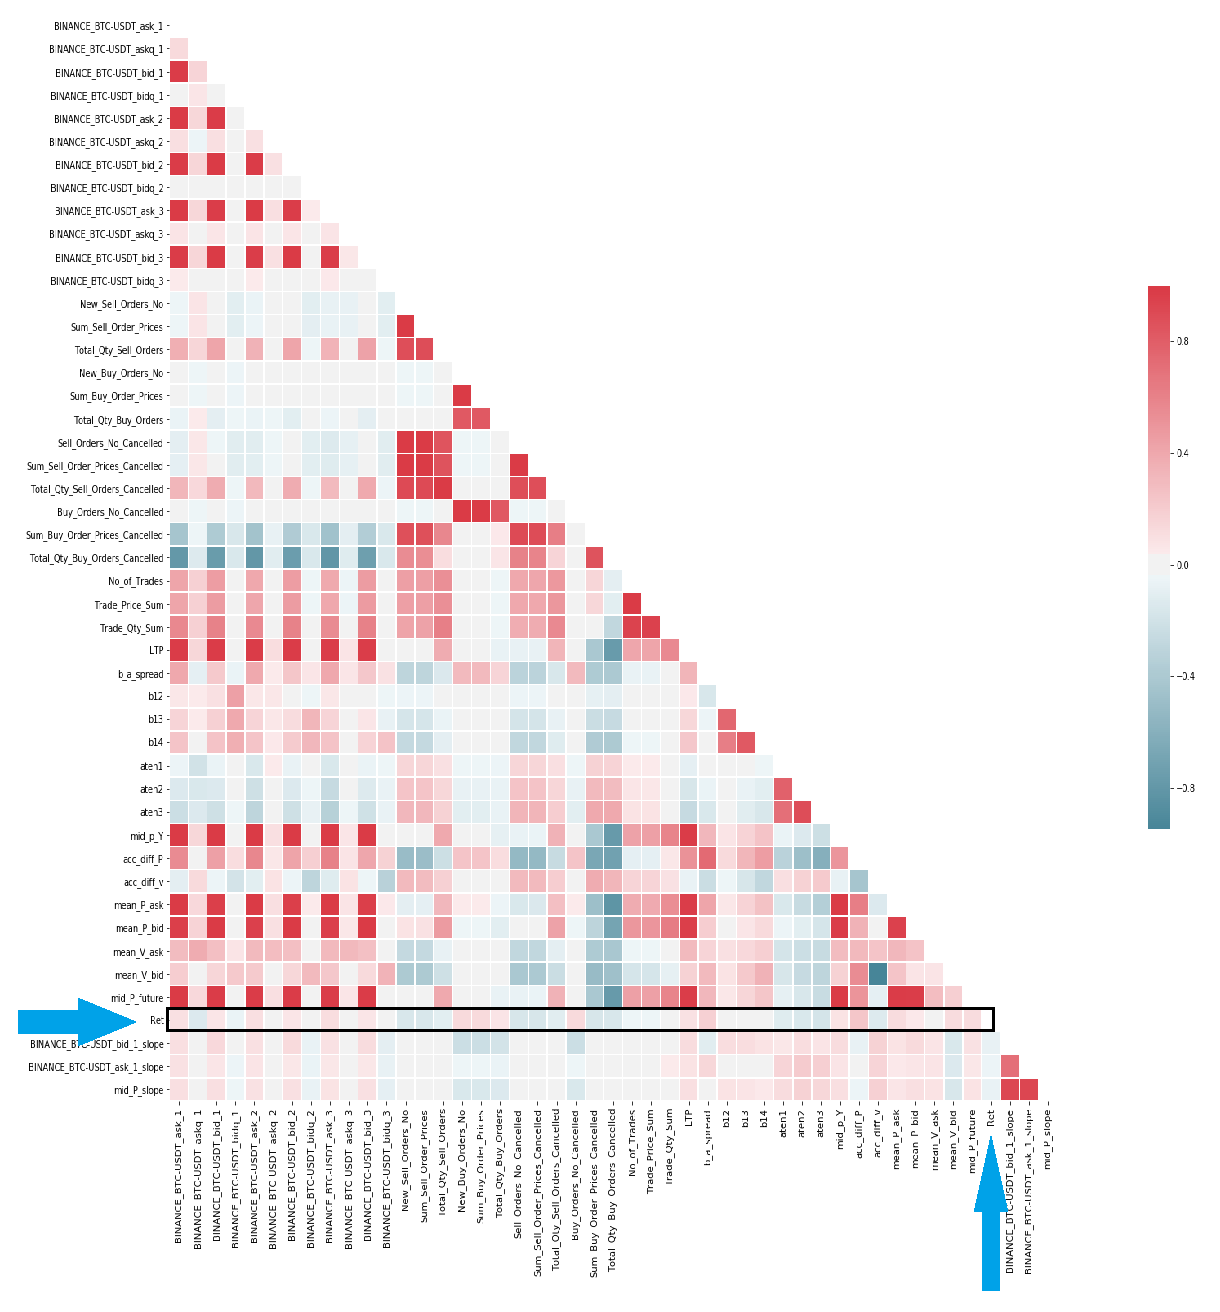

In [2]:
corr = Image.open("corr_plot.png")
corr

## Independent Variables
All the selected variables in the Feature Matrix are independant variables.

## Dependent Variable
Dependent variable is the return-class (0, 1, and 2)  onehotencoded into 3 categorical digits.

## Train-Test split
From the total 127764 samples, last 25000 samples were used as test data and the remaining as training data.

## Model
The Neural Network classifier has 3 Dense layers with 2 hidden layers with 8 and 4 nodes respectively.

## Input and Output
It takes 11 inputs and produces 3 categorical bits cummulatively referring to one of the three classes.
- Class 2: Positive    (**return >= 2.1779**)
- Class 1: Negative    (**return <= -2.1779**)
- Class 0: Neutral     (**-2.1779 < return < 2.1779**)

## Training
The model was run for 100 epochs with the **validation split = 0.2** and **batch-size = 16**
- Activation function in the hidden layers: **relu**
- Activation function in the output layers: **softmax**
- Loss parameter: **categorical_crossentropy**
- Stochastic Geadient Descent Algorithm: **Adam(lr=0.001)**

## Model accuracy versus epoch

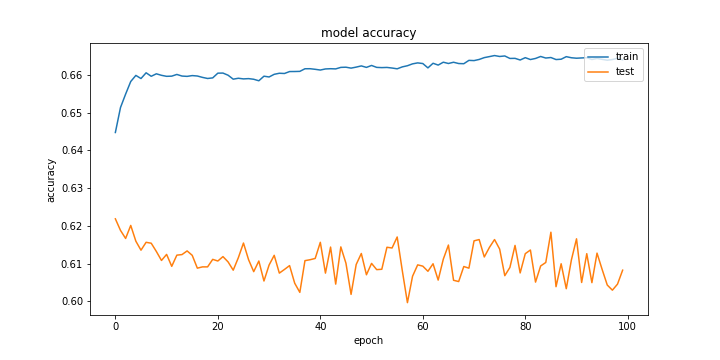

In [4]:
model_acc = Image.open("model_acc.png")
model_acc

## Model loss versus epoch

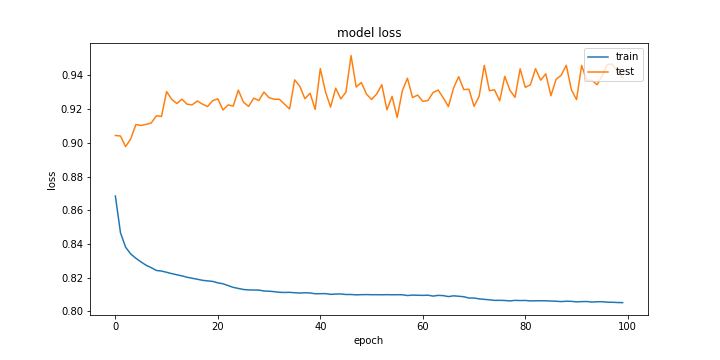

In [6]:
model_loss = Image.open("model_loss.png")
model_loss